In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
data = pd.read_csv('Fraud_check.csv')
data.sample(5)

Undergrad Marital.Status  Taxable.Income  City.Population  \
145        NO       Divorced           33962           197422   
559       YES       Divorced           72026           180424   
257       YES        Married           54747            31611   
213       YES         Single           62365           107069   
435        NO       Divorced           91547           111774   

     Work.Experience Urban  
145                2   YES  
559               26    NO  
257               17   YES  
213               13    NO  
435                4   YES

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
# Renaming columns
data = data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head(5)

under_grad marital_status  taxable_income  city_population  work_experience  \
0         NO         Single           68833            50047               10   
1        YES       Divorced           33700           134075               18   
2         NO        Married           36925           160205               30   
3        YES         Single           50190           193264               15   
4         NO        Married           81002            27533               28   

  urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [6]:
data.describe()

taxable_income  city_population  work_experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

<Figure size 1080x1080 with 0 Axes>

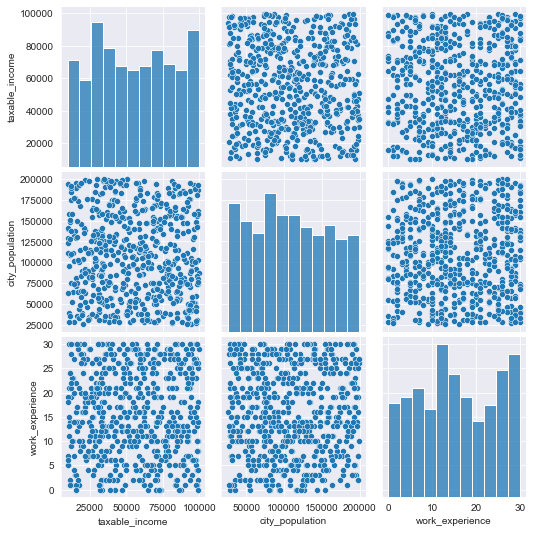

In [7]:
# visualizing the data
import seaborn as sns
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.pairplot(data)
plt.show()

<AxesSubplot:>

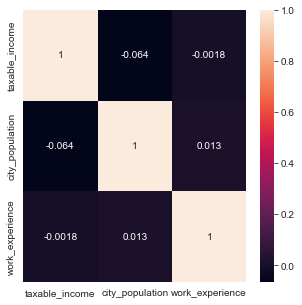

In [8]:
# checking correlation between features
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)

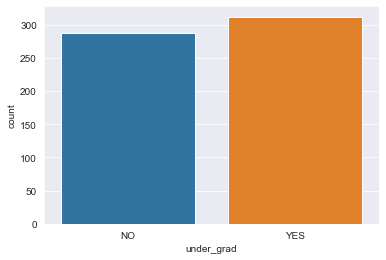

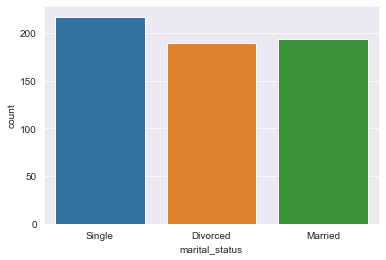

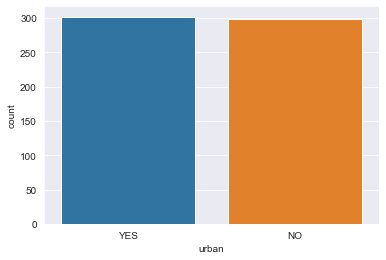

In [9]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(data['under_grad'])
plt.show()

sns.countplot(data['marital_status'])
plt.show()

sns.countplot(data['urban'])
plt.show()

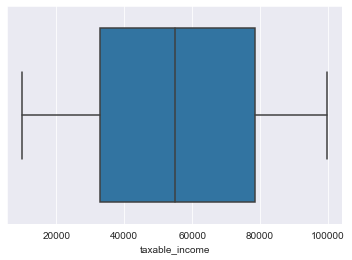

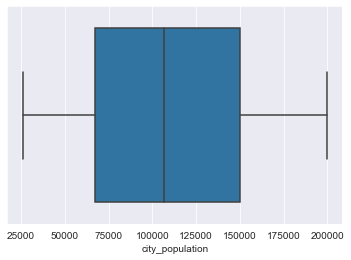

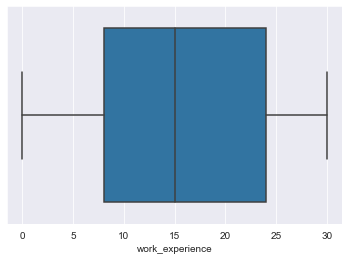

In [10]:
# Checking for outliers in numerical data
sns.boxplot(data['taxable_income'])
plt.show()

sns.boxplot(data['city_population'])
plt.show()

sns.boxplot(data['work_experience'])
plt.show()

In [11]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good" as per given problem statement
data['taxable_income'] = pd.cut(x = data['taxable_income'],bins = [10002,30000,99620],labels=['Risky','Good'])
data.sample(5)

under_grad marital_status taxable_income  city_population  \
210        YES         Single           Good           125993   
530        YES       Divorced           Good           194421   
106        YES         Single          Risky            58535   
365         NO       Divorced           Good           134321   
197         NO         Single           Good            98056   

     work_experience urban  
210               13   YES  
530               17   YES  
106               20   YES  
365               10   YES  
197                4   YES

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

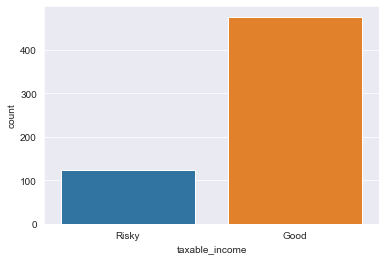

In [12]:
sns.countplot(data['taxable_income'])

In [13]:
# converting text data to numerical values
label_encoder = preprocessing.LabelEncoder()

data['under_grad'] = label_encoder.fit_transform(data['under_grad'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['urban'] = label_encoder.fit_transform(data['urban'])
data['taxable_income'] = label_encoder.fit_transform(data['taxable_income'])
data.sample(5)

under_grad  marital_status  taxable_income  city_population  \
424           1               1               0            94199   
485           0               2               0            52766   
26            1               0               0           169128   
411           0               1               0            46253   
291           1               2               0            62475   

     work_experience  urban  
424                0      1  
485               23      0  
26                15      0  
411               19      0  
291               26      1

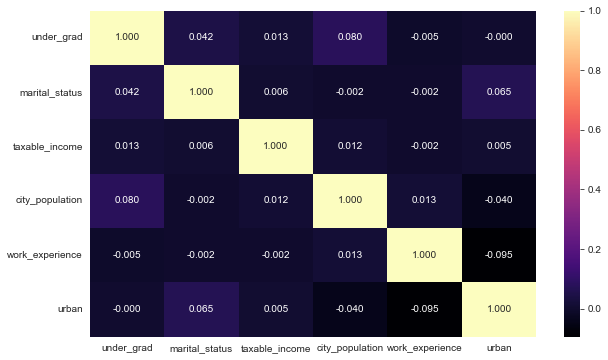

In [14]:
# Correlation analysis for given data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".3f")
plt.show()

In [15]:
# Dividing data into independent variables and dependent variable
x = data.drop('taxable_income', axis = 1)
y = data['taxable_income']
x

under_grad  marital_status  city_population  work_experience  urban
0             0               2            50047               10      1
1             1               0           134075               18      1
2             0               1           160205               30      1
3             1               2           193264               15      1
4             0               1            27533               28      0
..          ...             ...              ...              ...    ...
595           1               0            39492                7      1
596           1               0            55369                2      1
597           0               0           154058                0      1
598           1               1           180083               17      0
599           0               0           158137               16      0

[600 rows x 5 columns]

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_income, Length: 600, dtype: int32

In [17]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 20)

In [18]:
x_train

under_grad  marital_status  city_population  work_experience  urban
169           1               2            76933                6      1
531           1               1           124440               14      1
580           1               0           123335                1      1
72            1               0           108300               27      1
261           0               2            68788                7      1
..          ...             ...              ...              ...    ...
218           0               1            38091               19      0
223           1               1           192297               17      1
271           0               2           183682               20      0
474           1               0            80729                0      0
355           1               2            56488               17      0

[402 rows x 5 columns]

In [19]:
y_train

169    0
531    0
580    0
72     0
261    0
      ..
218    0
223    0
271    0
474    0
355    0
Name: taxable_income, Length: 402, dtype: int32

In [20]:
x_test

under_grad  marital_status  city_population  work_experience  urban
493           0               1           103226               29      0
172           0               1            52819               23      1
352           0               0            72115               16      1
506           0               2           111105                8      1
595           1               0            39492                7      1
..          ...             ...              ...              ...    ...
222           1               0           168248               27      0
49            0               0           160195               15      1
47            1               2            34964                2      0
373           0               1           175719               21      1
26            1               0           169128               15      0

[198 rows x 5 columns]

### Building model based on C5.0 Algorithm / entropy

In [21]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 4)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

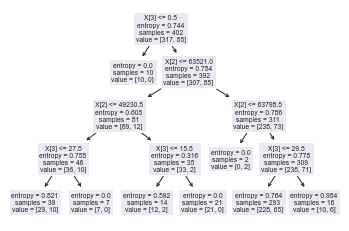

In [22]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [23]:
data.columns

Index(['under_grad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'urban'],
      dtype='object')

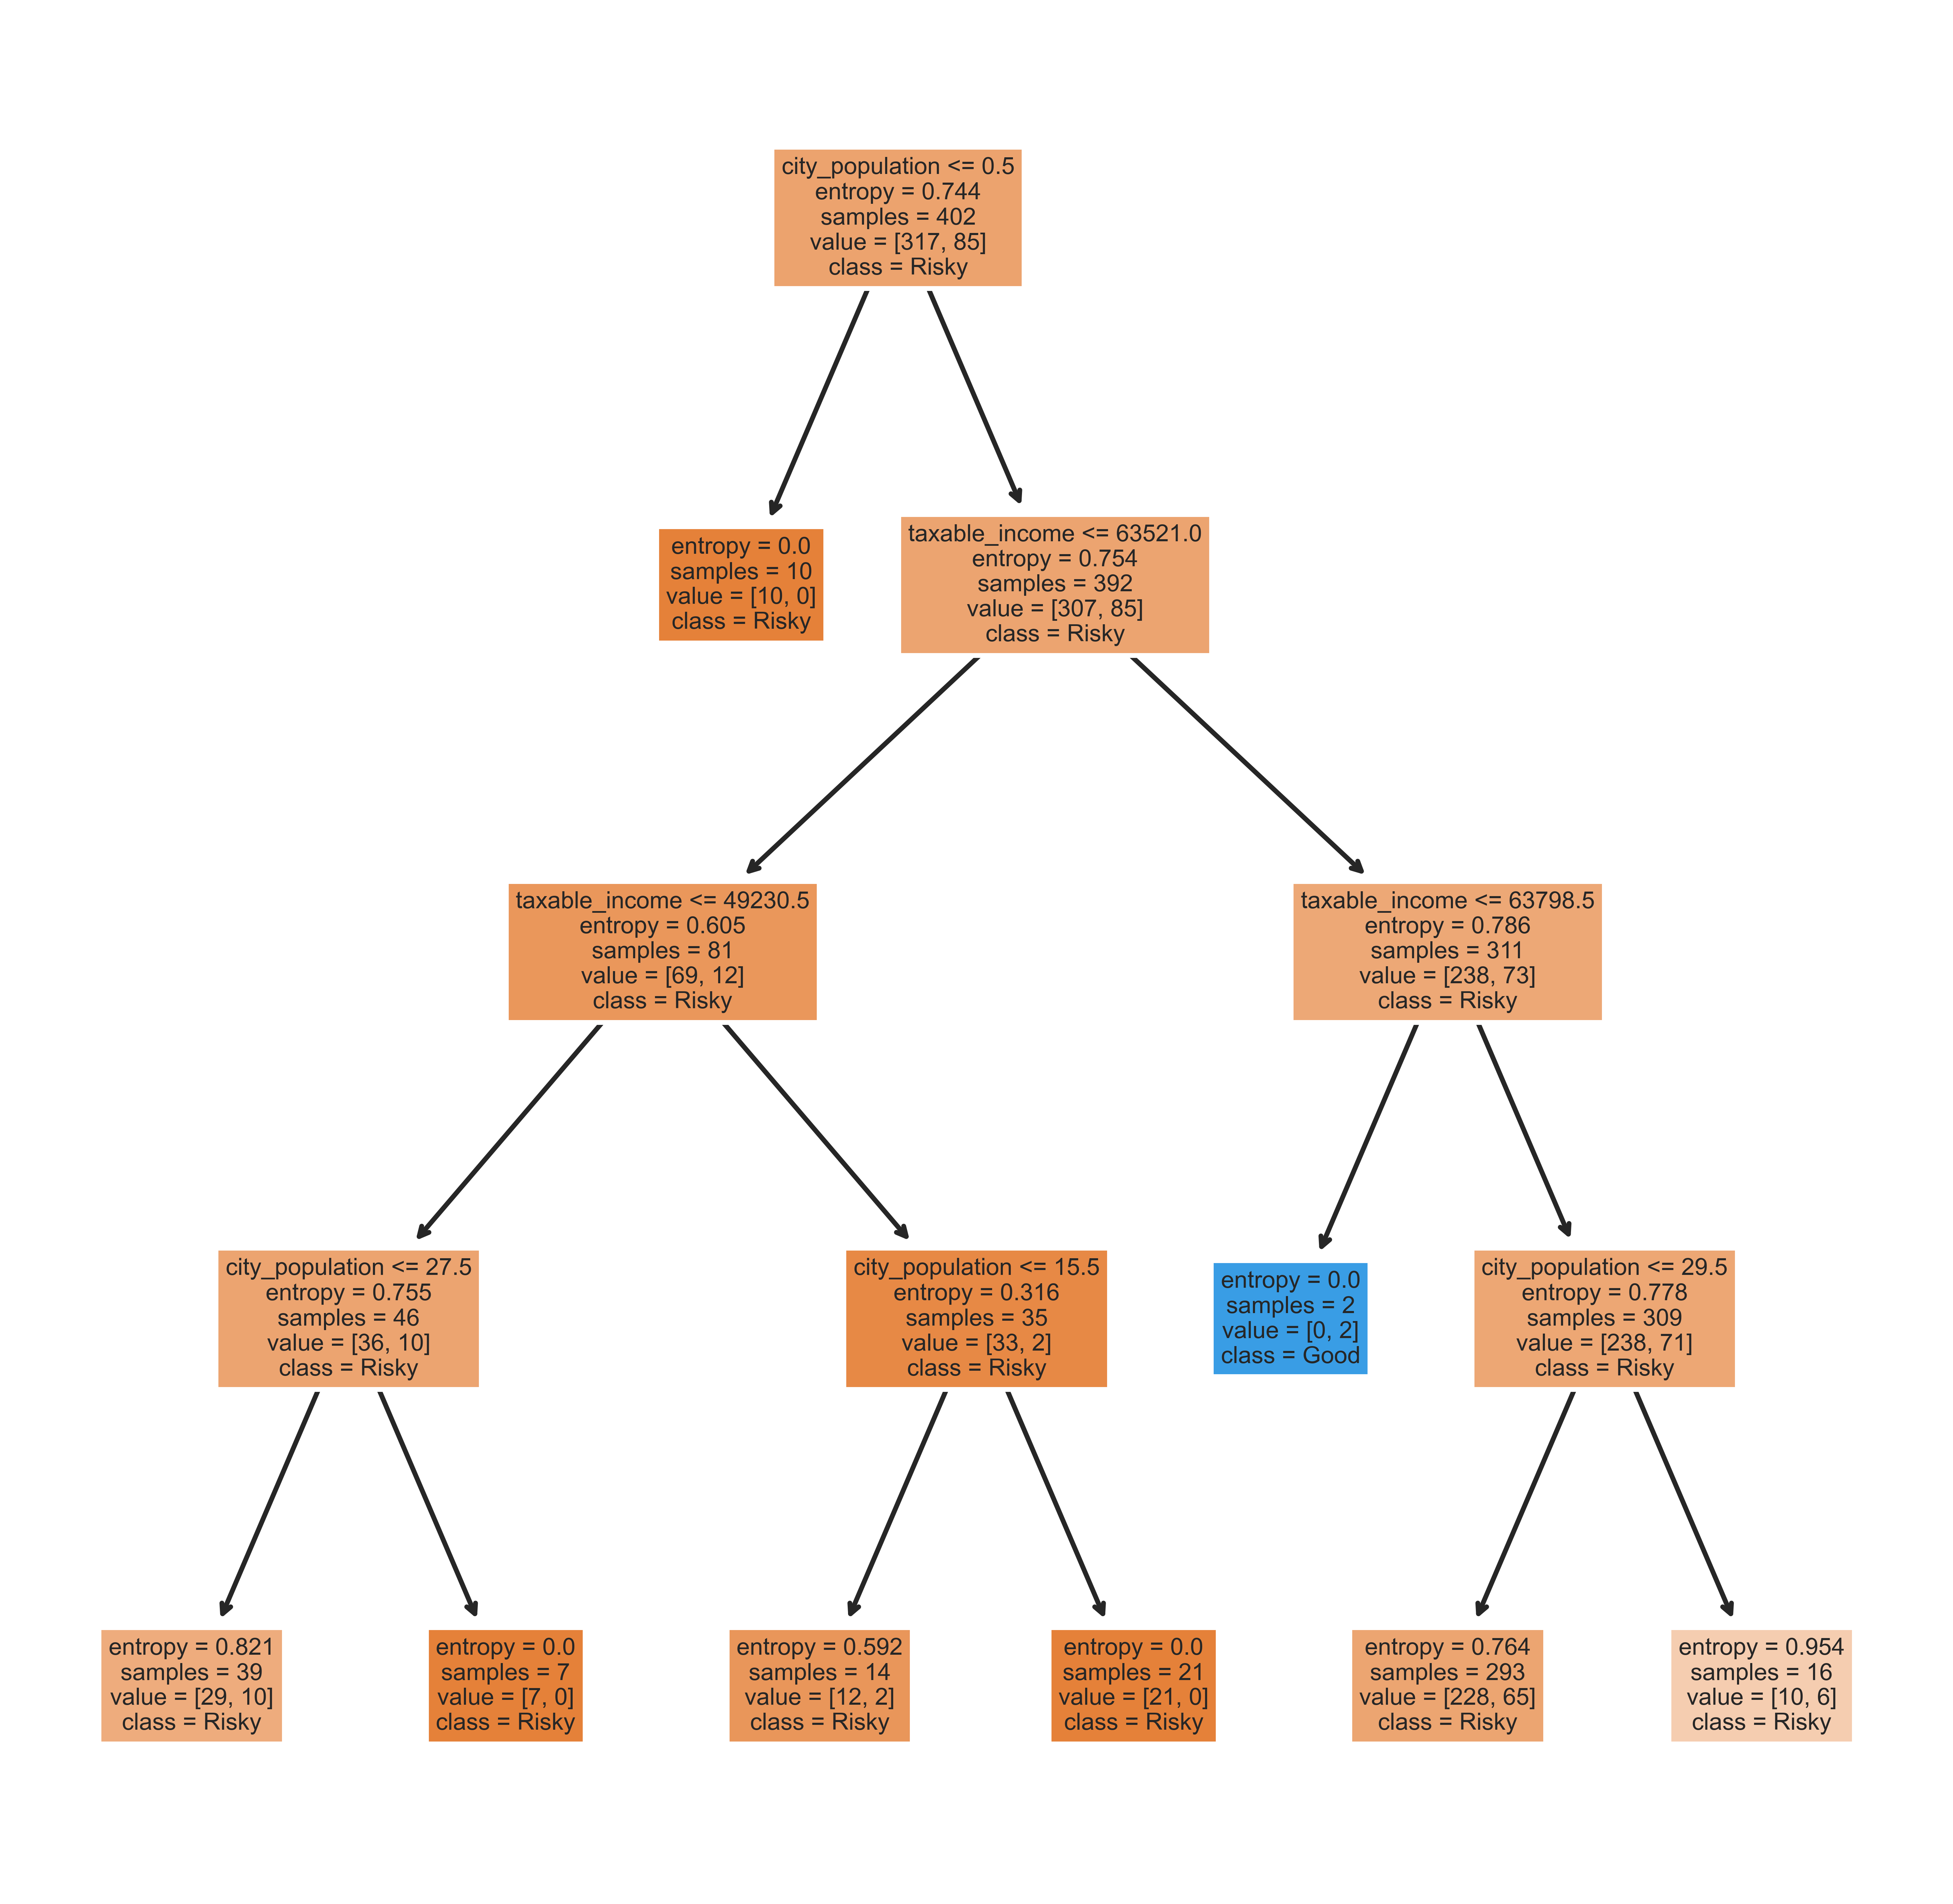

In [24]:
fn=['under_grad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=1000)
tree.plot_tree(model_c5,feature_names = fn,class_names=cn,filled = True);

In [25]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

0    198
dtype: int64

In [26]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0             0
taxable_income     
0               159
1                39

In [28]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.803030303030303

### Building model based on CART Algorithm /  Gini

In [29]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 5)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

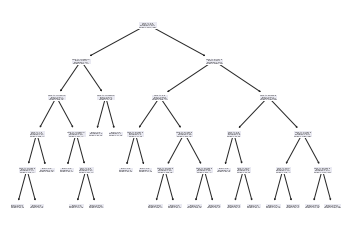

In [30]:
# Plotting Decision tree
tree.plot_tree(model_CART);

In [35]:
fn=['under_grad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=1000)
tree.plot_tree(model_CART,feature_names = fn,class_names=cn,filled = True);

In [32]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

0    190
1      8
dtype: int64

In [33]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0             0  1
taxable_income        
0               153  6
1                37  2

In [34]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.7828282828282829